## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets


# Study data files
mouse_metadata_path = "csv data files/Mouse_metadata.csv"
study_results_path = "csv data files/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# check shape of merged data
merged_data.shape

(1893, 8)

In [3]:
# Checking the number of mice with duplicate timepoints.
duplicate_mice = merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]).sum()
duplicate_mice

5

In [4]:
# display mouse id with duplicate timepoints
display_duplicate_mice = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]), :]
display_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]), ['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = merged_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])


In [8]:
# Checking the number of mice in the clean DataFrame.
no_duplicates.shape

(1888, 8)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = no_duplicates.groupby('Drug Regimen').agg(
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
        Tumor_Vol_Std=('Tumor Volume (mm3)', np.std),
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)
).round(3)

summary_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Std,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

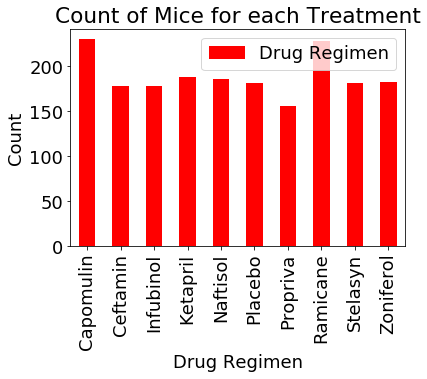

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = no_duplicates.groupby('Drug Regimen')
total_mice_count = pd.DataFrame(total_mice['Drug Regimen'].count())

# Create a dataframe counting the number of data points for each Drug Regimen
mice_bar = total_mice_count.plot(kind="bar", title="Count of Mice for each Treatment", color="red")

plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.savefig('../Images/MiceBarChart.png')
plt.show();


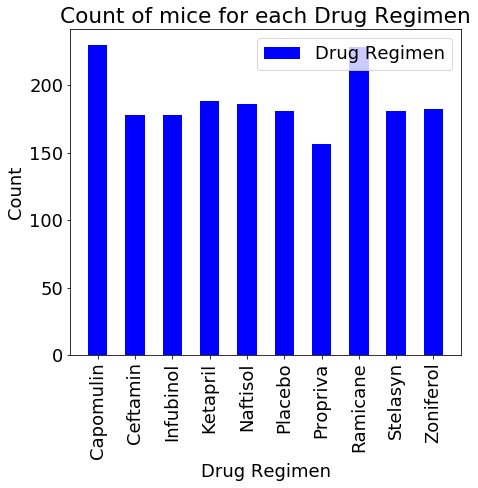

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(total_mice_count))
tick_locations = [value for value in x_axis]

# create chart
plt.figure(figsize=(7,6))
plt.bar(x_axis, total_mice_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(total_mice_count.index), rotation="vertical")

# Set a Title and labels
plt.title("Count of mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("../Images/PyplotBarChart.png")
plt.show();

In [42]:
# count of mice by sex
gender_group = no_duplicates.groupby('Sex')
gender_count = pd.DataFrame(gender_group['Sex'].count())
gender_count.head()

,Sex
Sex,
Female,930
Male,958


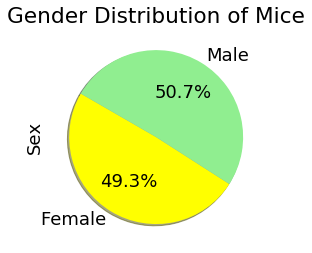

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_pie = gender_count.plot(kind="pie", y='Sex', title="Gender Distribution of Mice", autopct='%1.1f%%', shadow=True, startangle= 150, 
                               fontsize=18, colors=["yellow", "lightgreen"], legend=False)

plt.savefig("../Images/Genderpiechart.png")
plt.show();

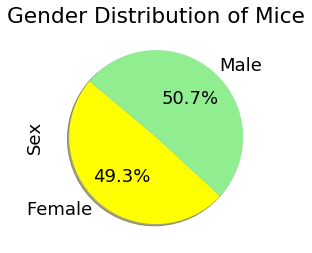

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
pie_sections = gender_count['Sex']

# The colors of each section of the pie chart
colors = ["yellow", "lightgreen"]

plt.pie(pie_sections, labels=['Female', 'Male'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 18
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex")
plt.savefig("../Images/PyplotPieChart.png")
plt.show();


# Quartiles and IQR

In [15]:
# Final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

Capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, merged_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, merged_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, merged_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, merged_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


# Box and Whisker Plot

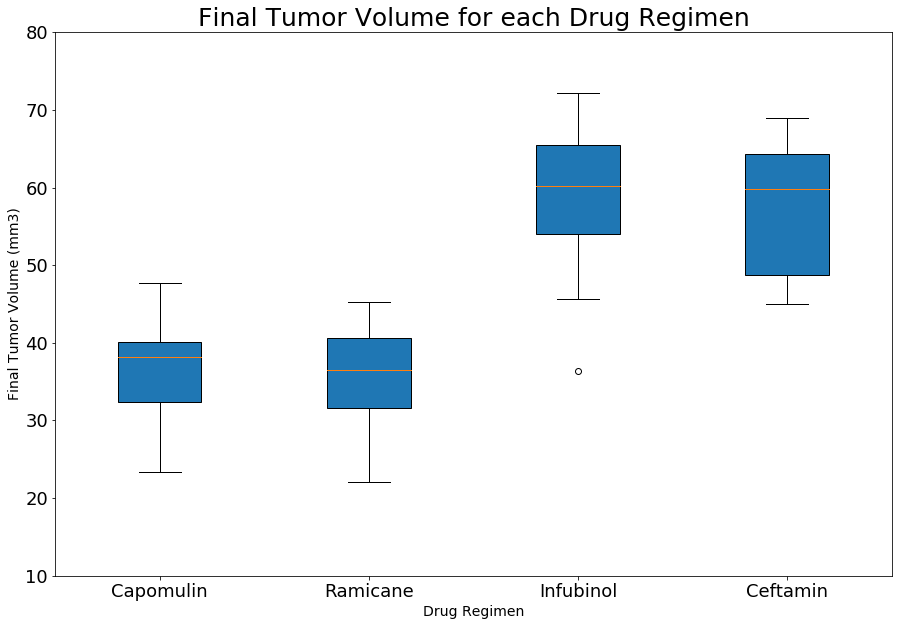

In [52]:
boxplot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor Volume for each Drug Regimen',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(boxplot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

# Line and Scatter Plots for Capomulin Treatment

In [34]:
capo_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g288",:]
capo_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1


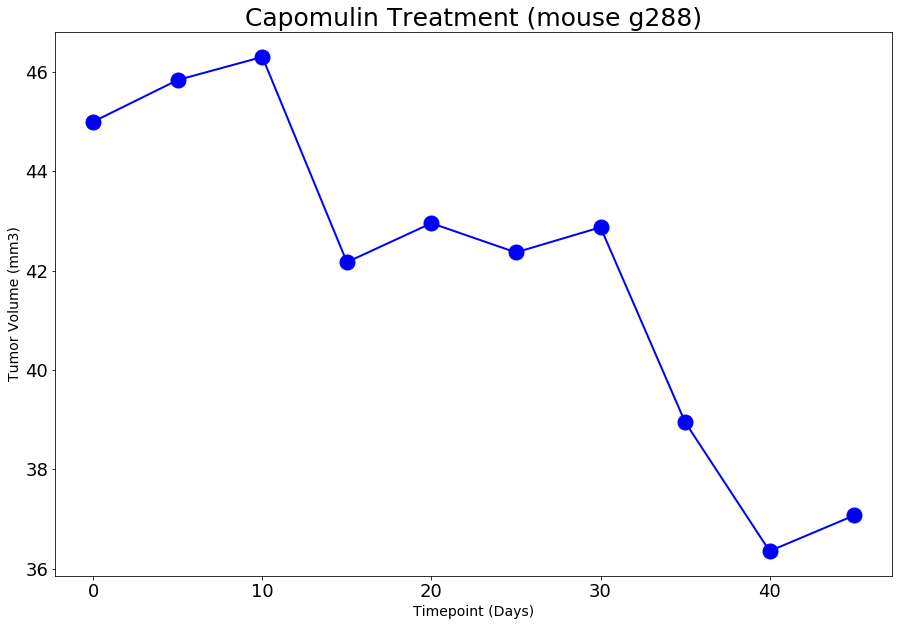

In [39]:
x_axis = capo_mouse_df["Timepoint"]
tumsiz = capo_mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin Treatment (mouse g288)',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

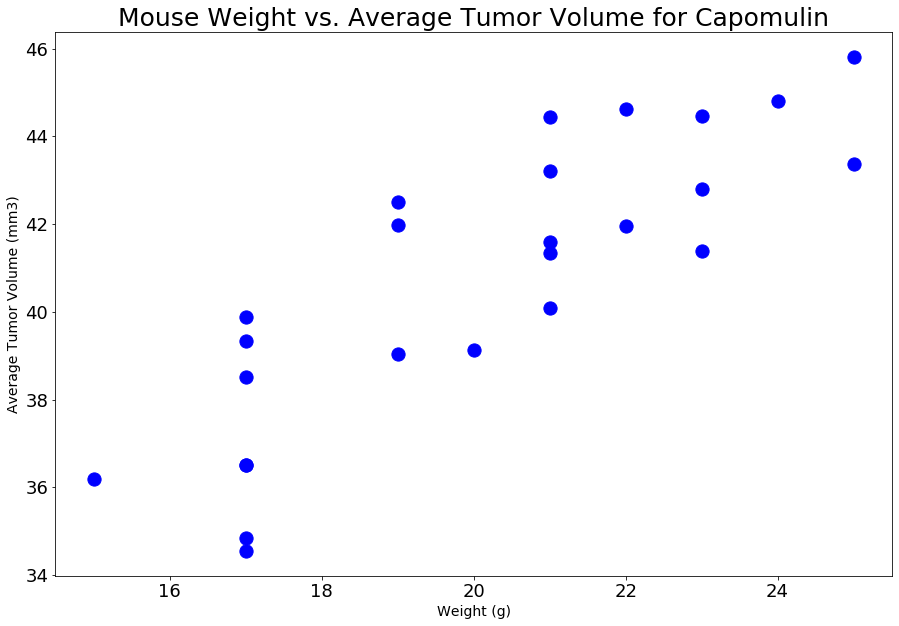

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

# Correlation and Regression for Capomulin Treatment

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [28]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


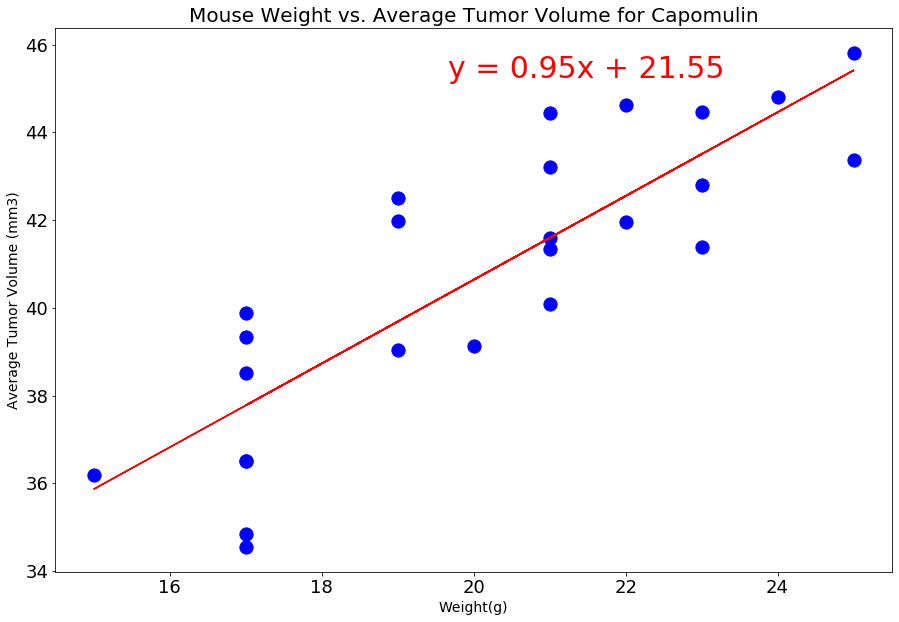

In [32]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()